# Final Project Report

* Class: DS 5100
* Student Name: Nathan Koh
* Student Net ID: unu3vx
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/nkoh1/DS5100-Final-project/commits?author=nkoh1

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [133]:
# A code block with your classes.
import numpy as np
import pandas as pd
import random

class Die: 
    """
    The Die class takes a NumPy array to act as a face of the object. In this case, it will be either a 6-sided die or a coin which has 2 sides.
    The data type of the array may be either strings or numbers with all values being distinct from each other. By default, a die or a coin will have the same weight for each side.

    Methods:
    -----------
    weight_change(self, weight, die_face):
        Changes the weight of a specific side or sides of the die.
    
    roll_dice(self, n_rolls=1):
        Lets the user roll the die an arbitrary number of times. The default number of rolls is 1.
    
    roll_state(self):
        Returns the latest roll result in a dataframe. This includes the values of the die and its weights.
    
    """
    def __init__ (self, n_sides: np.ndarray, weight: np.ndarray):
        """
        Description: Initializes the Die object with sides and weights. Default weight is 1 and sides is 6.
        
        __init__ Parameters: 
            n_sides: NumPy array
            weight: NumPy array
            
        Raises:
        
        TypeError: If n_sides is not a NumPy array.
        
        ValueError: If the values assigned to n_sides are not unique.
    
        """
        if not isinstance(n_sides, np.ndarray):
            raise TypeError("n_sides must be NumPy array")

        if len(n_sides) != len(set(n_sides)):
            raise ValueError("Values in this array are not unique")
        
        self.n_sides = n_sides
        
        if weight is None:
            self.weight = np.ones(len(n_sides))
        
        
        self.weight = weight

        self._side_wt = pd.DataFrame({"Sides":self.n_sides, 'Die': self.weight})
        
    def weight_change(self, weight, die_face): #weight default 1
        """
        Description: Lets the user change the weight of a dice face. Default weight is 1.

        weight_change Parameters: 
            weight: integer
            die_face: integer
            
        Raises:

        TypeError: If weight is not of the correct data type.
        
        IndexError: If the chosen dice face is not in the NumPy array (ie: choosing 7 when there are only 6 sides).
        
        """
        if not isinstance (weight, int) or weight <=0:
            raise TypeError("The weight is not a valid type.")
        if die_face not in self.n_sides:
            raise IndexError(f"{die_face} is not a valid index")

         
        index = np.where(self.n_sides ==die_face)[0][0]
        self.weight[index]= weight #updates weight
        
        self._side_wt['Die'] = self._side_wt.apply(lambda row: weight if row['Sides'] == die_face else row['Die'], axis=1)


        
    def roll_dice(self, n_rolls=1): #defaulted to 1 roll
        """
        Description: Rolls the dice a specified number of times. The default number of rolls is 1.
        
        roll_dice Parameters: 
            n_rolls: integer

            
        Raises:
        
        None
    
        """
        throw = np.random.choice(self.n_sides, size = n_rolls, p = self.weight / np.sum(self.weight))
        return throw.tolist()
    
    
    def roll_state(self):
        """
        Description: Returns the most recent roll results as a private dataframe.
        
        roll_state Parameters: 
            None
        
        Raises:
            None
        """
        return self._side_wt.copy()

class Game: 
    """
    The Game class consists of rolling one or more dice (dice objects) multiple times. All dice in this scenario have 6 sides but weights can be changed.
    The latest result of the last game played will be kept.
    
    Methods:
    -----------
    play_game(self, rolls):
        Performs a certain number of dice rolls and stores the results in a dataframe.
        
    recent_play(self, view = "wide"):
        Returns a copy of the most recent play in a private dataframe. The dataframe can be viewed in a wide or narrow format.
    
    roll_state(self):
        Returns the latest roll result in a dataframe. This includes the values of the die and its weights.
    
    """
    def __init__(self, n_sides =6):
        """
        Description: Initializes a Die object with 6 sides. These are arbitrary number of dice.

        __init__ Parameters:
            n_sides: integer
            
        Raises:
            TypeError: Checks to see if the number of sides entered is an integer. This is an optional check.
        """   
        if not isinstance(n_sides, int):
            raise TypeError("The value entered is not an integer.")
            
        self.die = Die(np.arange(1, n_sides+1), np.ones(n_sides)) #calls Die class and specifies sides
        self._side_wt = pd.DataFrame() #initializing pd.dataFrame
 
    def play_game(self, rolls):
        """
        Description: Rolls an unspecified number of dice and returns those values in a private dataframe. The default view of the dataframe is wide but can also be viewed narrow.
        
        play_game Parameters:
            rolls: integer
        
        Raises:
            None
        """
        roll_results = self.die.roll_dice(rolls)
        
        rr_big = np.array(roll_results).reshape(1,rolls)
        
        dice_df = pd.DataFrame(rr_big, columns = [f'Roll # {i+1}'
                                                        for i in range(rolls)])
        
        self._side_wt = pd.concat([self._side_wt, dice_df], axis=1)
        
        return self._side_wt
        
    
    def recent_play(self, view = "wide"): #form = wide, defaults to wide view. also shows last play
        """
        Description: Returns the most recent play of rolled dice. The dataframe can be viewed in a wide or narrow form.
        
        recent_play Parameters:
            view: string
        
        Raises:
            ValueError: Any string that is not wide or narrow will raise this error.
        """
        if view == "wide":
            return self._side_wt
        elif view =="narrow":
            return self._side_wt.melt(var_name= "Die",value_name = "Side")
        else:
            raise ValueError("Invalid input. Dataframe must be either wide or narrow")


class Analyzer:
    """
    The Analyzer class takes an Analyzer object which returns the results of a single game and computes various descriptive statistical properties about it.
    
    Methods:
    -----------
    jackpot_results(self):
        Returns the number of times all dice roll the same number. (ie: three dice land on side 2)
        
    count_sides_rolled(self):
        Returns the number of times each side of the dice is rolled. It then returns the result in a dataframe.
    
    perm_counter(self):
        Computes the number of permutations based on the dice roll results. It will then return the total number of permutations as an integer and also as a dataframe.
    
    """
    def __init__(self,game_result):
        """
        Description: Takes a Game object as its parameter and throws a ValueError if it's not.
        
        __init__ parameters:
            game_result: Game object
            
        Raises:
            ValueError: checks to see if the game_result object is part of the Game class. If not, throws error        
        """

        if not isinstance(game_result,Game): #checks to see if game_result is a Game object.
            raise ValueError("This is not a Game object.")
            
        self.game_result = game_result
        self.output = self.game_result.play_game(5)
        
    
    def jackpot_results (self): #jackpot method   
        """
        Description: Returns the number of times all dice roll the same number.
        
        jackpot_results parameters: 
            None
        
        Raises:
            None
        """
        jpot_check = self.game_result._side_wt.values #checks if the dice rolled results in a jackpot and stores in _side_wt private df
        
        jpot_ct =0 #jackpot counter
        
        for i in jpot_check.T:
            if len(set(i)) == 1:
                jpot_ct+=1
        return jpot_ct

    def count_sides_rolled(self):
        """
        Description: Counts the number of times each side of a die is rolled
        
        count_sides_rolled parameters: 
            None
        
        Raises:
            None
        """
        if self.output is not None: #from Analyzer init
            
            throw_results = {i:0 for i in range(1,7)} #simulating dice roll
            
            for i in self.output.columns:
                roll_sides = self.output[i].values #creates a column and stores value in column
                
            for j in roll_sides:
                if j in throw_results:
                    throw_results[j] +=1
                
            throw_results_df = pd.Series(throw_results).sort_index()
            return throw_results_df

    def perm_counter(self):
        """
        Description: Returns the total number of permutations based on the rolls completed. Will also return a dataframe.
        
        perm_counter parameters: 
            None
        
        Raises:
            None
        """
        throw_results = self.output.values.flatten() #creates 1D array to then convert to a df; NumPy documentation

        perm_list = np.array(list(np.random.permutation(throw_results) for i in range(len(throw_results)))) #stores all permutations
        
        final_perm_df = pd.DataFrame(perm_list, [f'Roll # {i+1}'
                                                        for i in range(len(throw_results))]) 
        
        perm_total = len(final_perm_df)
        return perm_total, final_perm_df #returns both df and count of permutations
               

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

import pandas as pd \
import montecarlo\
from montecarlo import Die\
from montecarlo import Game\
from montecarlo import Analyzer\
import unittest\
import numpy as np\

class MonteCarloTesting(unittest.TestCase):
    def test_init_function(self):
        n_sides = np.array([1,2,3,4,5,6])
        weight = np.array([1,1,1,2,3,1])
        
        die = Die(n_sides,weight)
        
        np.testing.assert_array_equal(die.n_sides, n_sides)
        np.testing.assert_array_equal(die.weight, weight)

        
    def test_weight_change(self):
        n_sides = np.array([1,2,3,4,5,6])
        weight = np.array([1,1,1,2,3,1])
        
        self.die = Die(n_sides, weight)
        
        self.die.weight_change(5,3)
        self.assertEqual(self.die.weight[2],5)
        self.assertEqual(self.die._side_wt.loc[self.die._side_wt['Sides']==3, 'Die'].values[0],5)

    def test_roll_dice(self):
        
        n_sides = np.array([1,2,3,4,5,6])
        weight = np.array([1,1,1,2,3,1])
        
        self.die = Die(n_sides, weight)
        result = self.die.roll_dice(5)
        
        
        
        for r in result:
            self.assertIn(r, self.die.n_sides)
            
        self.die.weight_change(5,3) #increases weight of 3 5x

        result = self.die.roll_dice(5)
        roll1 = result.count(3)
        roll2 = result.count(2)
        
          
    def test_roll_state(self):
        n_sides = np.array([1,2,3,4,5,6])
        weight = np.array([1,1,1,2,3,1])
       
        self.die = Die(n_sides, weight)
        
        first = self.die.roll_state()
        
        self.assertTrue(isinstance(first, pd.DataFrame))
        self.assertEqual(first.shape, (6,2))
        self.assertTrue('Sides' in first.columns)
        self.assertTrue('Die' in first.columns)
        
        self.die.weight_change(5,2) #modifying weight after initializing
        
        last = self.die.roll_state()
        #checking die state
        self.assertEqual(last.loc[last['Sides']==2, 'Die'].values[0],5)
        

        
    def test_game_init(self):
       # n_sides = np.array([1,2,3,4,5,6])
       ## weight = np.array([1,1,1,2,3,1])
        #self.die = Die(n_sides, weight)
        play = Game(6) #standard 6 sided die
        
        self.assertIsInstance(play.die, Die)
        
        play_init = isinstance(play._side_wt, pd.DataFrame)
        
        self.assertTrue(play_init)
        
    def test_play_game(self):
        play = Game(6)
        play_df = play.play_game(10) #10 rolls
        self.assertIsInstance(play_df, pd.DataFrame)
        
        self.assertIsInstance(play._side_wt, pd.DataFrame)
        
        
        
    def test_recent_play(self):
        play = Game(6)
        play_df = play.play_game(10) #10 rolls
        play_wide_df = play.recent_play(view = 'wide')
        self.assertIsInstance(play_wide_df, pd.DataFrame)
        self.assertEqual(play_wide_df.shape[1],10) #checking to see if the dataframe shows as wide for 10 rolls
        
        play_narrow_df = play.recent_play(view='narrow')
        self.assertIsInstance(play_narrow_df, pd.DataFrame)
        self.assertTrue(play_narrow_df.shape[1] ==2) #checking for narrow view where there are only 2 columns in index 1
    
    
    def test_jackpot_results(self):
        play = Game(6)
        play_results = Analyzer(play)
        
        jpot_ct = play_results.jackpot_results()
        analyzer_ct = self.assertIsInstance(jpot_ct, int)
        
    def test_count_sides_rolled(self):
        play = Game(6)
        play_results = Analyzer(play)
        
        roll_results = play_results.count_sides_rolled()
        
    

        

    
        
        
        
        
        
if __name__ == '__main__':\
    unittest.main(verbosity=3)


## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

In [3]:
# A text block with the output of a successful test.
"""
bash-4.4$python -m unittest montecarlounittest.py
.........
----------------------------------------------------------------------
Ran 10 tests in 0.021s

OK
"""


'\nbash-4.4$python -m unittest montecarlounittest.py\n.........\n----------------------------------------------------------------------\nRan 10 tests in 0.021s\n\nOK\n'

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [72]:
# e.g. import named as demo 
import demo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [30]:
# help(montecarlo)
help(Die) #docstring for Die class and its methods

Help on class Die in module __main__:

class Die(builtins.object)
 |  Die(n_sides: numpy.ndarray, weight: numpy.ndarray)
 |  
 |  The Die class takes a NumPy array to act as a face of the object. In this case, it will be either a 6-sided die or a coin which has 2 sides.
 |  The data type of the array may be either strings or numbers with all values being distinct from each other. By default, a die or a coin will have the same weight for each side.
 |  
 |  Methods:
 |  -----------
 |  weight_change(self, weight, die_face):
 |      Changes the weight of a specific side or sides of the die.
 |  
 |  roll_dice(self, n_rolls=1):
 |      Lets the user roll the die an arbitrary number of times. The default number of rolls is 1.
 |  
 |  roll_state(self):
 |      Returns the latest roll result in a dataframe. This includes the values of the die and its weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_sides: numpy.ndarray, weight: numpy.ndarray)
 |      Description: Initialize

In [29]:
help(Game) #docstring for Game class and its methods

Help on class Game in module __main__:

class Game(builtins.object)
 |  Game(n_sides=6)
 |  
 |  The Game class consists of rolling one or more dice (dice objects) multiple times. All dice in this scenario have 6 sides but weights can be changed.
 |  The latest result of the last game played will be kept.
 |  
 |  Methods:
 |  -----------
 |  play_game(self, rolls):
 |      Performs a certain number of dice rolls and stores the results in a dataframe.
 |      
 |  recent_play(self, view = "wide"):
 |      Returns a copy of the most recent play in a private dataframe. The dataframe can be viewed in a wide or narrow format.
 |  
 |  roll_state(self):
 |      Returns the latest roll result in a dataframe. This includes the values of the die and its weights.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n_sides=6)
 |      Description: Initializes a Die object with 6 sides. These are arbitrary number of dice.
 |      
 |      __init__ Parameters:
 |          n_sides: integer
 |    

In [28]:
help(Analyzer) #docstring for Analyzer class and its methods

Help on class Analyzer in module __main__:

class Analyzer(builtins.object)
 |  Analyzer(game_result)
 |  
 |  The Analyzer class takes an Analyzer object which returns the results of a single game and computes various descriptive statistical properties about it.
 |  
 |  Methods:
 |  -----------
 |  jackpot_results(self):
 |      Returns the number of times all dice roll the same number. (ie: three dice land on side 2)
 |      
 |  count_sides_rolled(self):
 |      Returns the number of times each side of the dice is rolled. It then returns the result in a dataframe.
 |  
 |  perm_counter(self):
 |      Computes the number of permutations based on the dice roll results. It will then return the total number of permutations as an integer and also as a dataframe.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, game_result)
 |      Description: Takes a Game object as its parameter and throws a ValueError if it's not.
 |      
 |      __init__ parameters:
 |          game_result: Ga

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/nkoh1/DS5100-Final-project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Pasted code
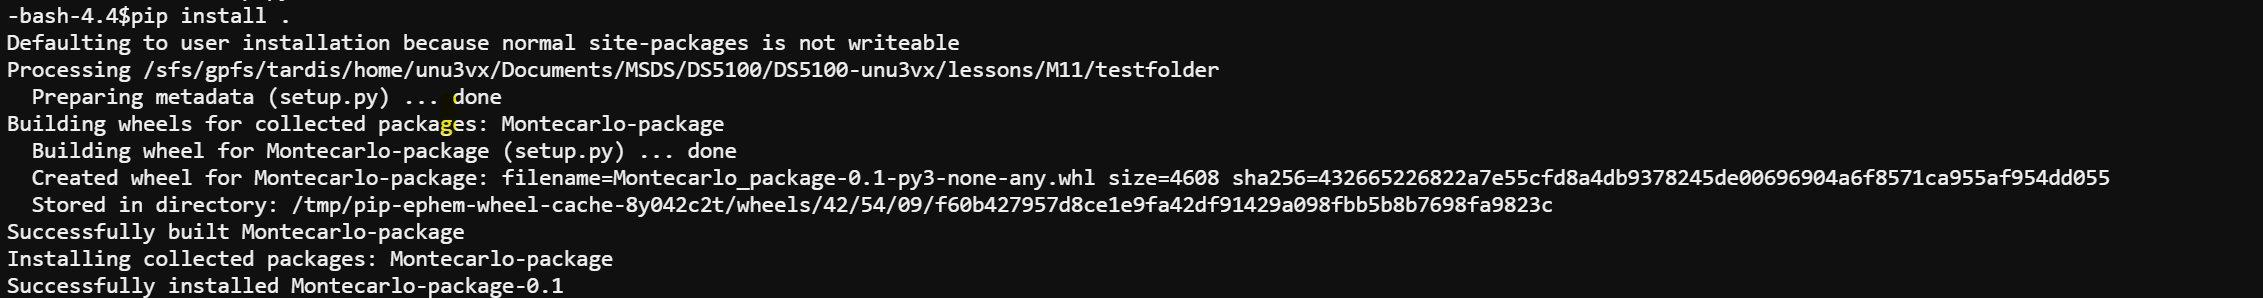

In [94]:
pip install .

Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/unu3vx/Documents/MSDS/DS5100/DS5100-unu3vx/lessons/M11/testfolder
  Preparing metadata (setup.py) ... done
  Created wheel for Montecarlo-package: filename=Montecarlo_package-0.1-py3-none-any.whl size=5560 sha256=3068554fb2c305a1ba200c68df84bf1a5623ac921cffdb9f5e2922f8be71ecbb
  Stored in directory: /tmp/pip-ephem-wheel-cache-c1uyarz8/wheels/42/54/09/f60b427957d8ce1e9fa42df91429a098fbb5b8b7698fa9823c
Successfully built Montecarlo-package
  Attempting uninstall: Montecarlo-package
    Found existing installation: Montecarlo-package 0.1
    Uninstalling Montecarlo-package-0.1:
      Successfully uninstalled Montecarlo-package-0.1
Note: you may need to restart the kernel to use updated packages.


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [67]:
#under Die class
import demo

sides=np.array(['H','T'])
weight = np.array([1,1])
weight2 = np.array([1,5]) #tails has a weight of 5

fair_coin = Die(sides,weight)
unfair_coin = Die(sides, weight2) #created both coins


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [86]:
#under Die class
fair_toss = fair_coin.roll_dice(1000)
fair_toss2 = fair_coin.roll_dice(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [90]:
#note that 1 is Heads, 2 is Tails
fair_coin_game = Game(n_sides=2)
unfair_coin_game = Game(n_sides=2)
unfair_coin_game2 = Game(n_sides =2)


fair_game_result = fair_coin_game.play_game(1000)
unfair_game_result = unfair_coin_game.play_game(1000)
unfair_game_result2 = unfair_coin_game2.play_game(1000)
#unfair_game_result

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [81]:
#asks for two games: 1 fair, 1 unfair
analyzer_fair = Analyzer(fair_coin_game)
analyzer_unfair_1= Analyzer(unfair_coin_game)

fair_jpot_freq = analyzer_fair.jackpot_results()
unfair_jpot_freq = analyzer_unfair_1.jackpot_results()

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [89]:
print(fair_jpot_freq,unfair_jpot_freq)

1015 1015


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

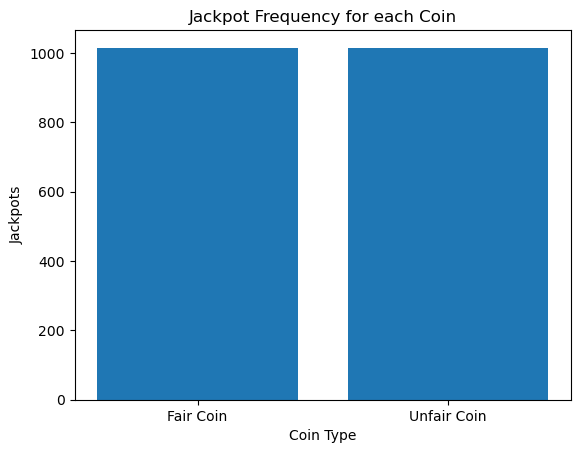

In [93]:
import matplotlib.pyplot as plt
import numpy as np

games = ['Fair Coin','Unfair Coin']
jackpot=[fair_jpot_freq,unfair_jpot_freq]

plt.bar(games, jackpot)

plt.xlabel("Coin Type")
plt.ylabel("Jackpots")
plt.title("Jackpot Frequency for each Coin")
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [95]:
n_sides = np.array([1,2,3,4,5,6])
weight = np.array([1,1,1,1,1,1])
d1 = Die(n_sides, weight)
d2 = Die(n_sides, weight)
d3 = Die(n_sides, weight)


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [131]:
d2 = Die(n_sides, weight=np.array([1,1,1,1,1,5])) #unfair die

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [132]:
d1 = Die(n_sides, weight = np.array([5,1,1,1,1,1])) #unfair die

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [101]:
d3 = Game(n_sides=6)

d3_result = d3.play_game(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [114]:
d1 = Game(n_sides =6)

d1_result = d1.play_game(10000)

In [103]:
d2 = Game(n_sides =6)
d2_result = d2.play_game(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

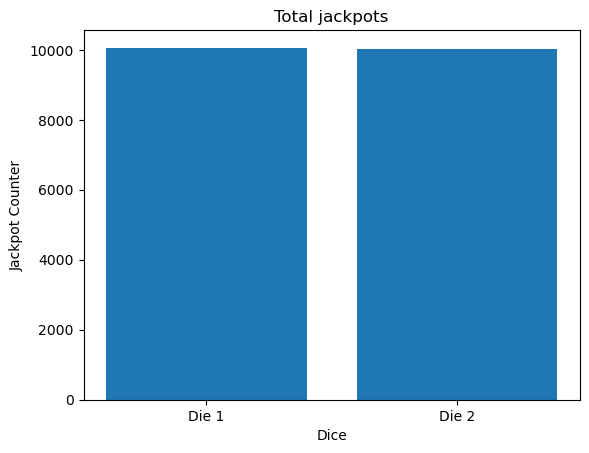

In [117]:
die_fair_analyzer = Analyzer(d3)
die_unfair_analyzer = Analyzer(d1)

jackpot_fair = die_fair_analyzer.jackpot_results()
jackpot_fair2 = die_unfair_analyzer.jackpot_results()

die = ['Die 1', 'Die 2']
jackpots = [jackpot_fair,jackpot_fair2]

plt.bar(die, jackpots)
plt.xlabel('Dice')
plt.ylabel('Jackpot Counter')
plt.title('Total jackpots')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [130]:
file = np.loadtxt("english_letters.txt", dtype='str') 

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).